In [1]:
import dsbhelper
import visualize
import nuclei
import os
import random
import numpy as np
import utils
from model import log
import model as modellib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon


%matplotlib inline 


/Users/farrar/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model_folder = 'gs://mwpdsb/mask_rcnn/model'
pretrained_weights = 'gs://mwpdsb/shapes/pretrained/mask_rcnn_coco.h5'
output_folder = 'gs://mwpdsb/mask_rcnn/output'
zip_folder = 'gs://mwpdsb/data/zips'

In [3]:
local_train_data_path = 'stage1_train'

# download the train data to the local instance
if not os.path.exists(local_train_data_path):
    dsbhelper.autoload_data(azip_folder + '/stage1_train.zip', 'stage1_train.zip', local_train_data_path)

In [4]:
config = nuclei.NucleiConfig()

In [5]:
# Instantiate the dataset object and load it with data
dataset_train = nuclei.NucleiDataset()
dataset_train.load_data(local_train_data_path, mode='train', filter_ids=dsbhelper.validation_set)
dataset_train.prepare()

In [6]:
print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 537
Class Count: 2
  0. BG                                                
  1. nuclei                                            


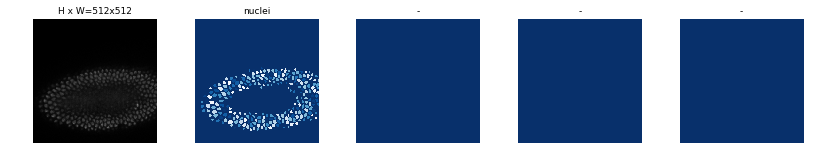

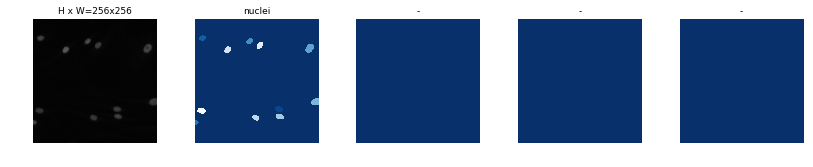

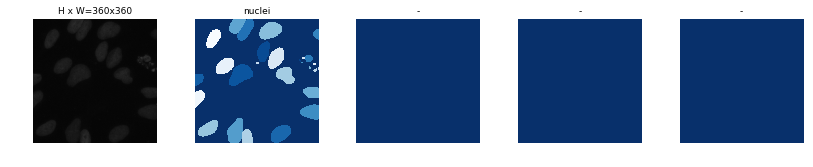

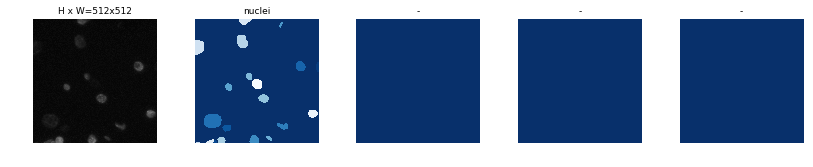

In [8]:
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

{'aug': 'none', 'specimen_id': '20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f', 'id': 329, 'mode': 'train', 'crop_origin_h': 20, 'path': 'stage1_train', 'crop_origin_w': 513, 'source': 'nucleis', 'full_height': 603, 'bg_color': 217, 'full_width': 1272}


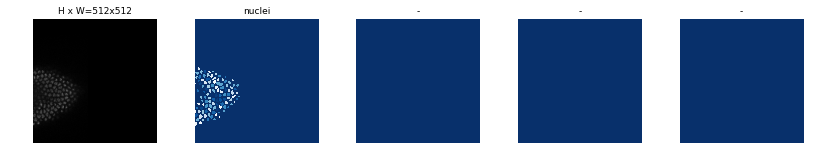

In [9]:
image = dataset_train.load_image(image_ids[0])
info = dataset_train.get_info(image_ids[0])
print(info)
mask, class_ids = dataset_train.load_mask(image_ids[0])
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)


(256, 320, 3)


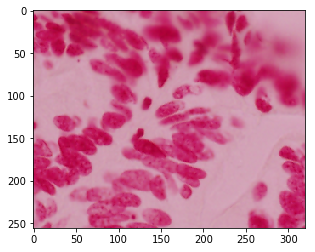

In [35]:
i = dsbhelper.get_specimen_image(local_train_data_path, '4d14a3629b6af6de86d850be236b833a7bfcbf6d8665fd73c6dc339e06c14607')
print(i.shape)
plt.imshow(i)

full height = 256
full width = 320
crop_origin_h = 107
crop_origin_w = 112


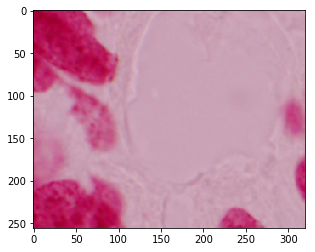

In [10]:
image_id = np.random.choice(dataset_train.image_ids, 1)
info = dataset_train.get_info(image_id[0])
i = dsbhelper.get_specimen_image(local_train_data_path, info['specimen_id'])
full_height, full_width, channels = i.shape
crop_origin_w = random.randint(0, full_width - 128)
crop_origin_h = random.randint(0, full_height - 128)
print ('full height = {}'.format(full_height))
print ('full width = {}'.format(full_width))
print ('crop_origin_h = {}'.format(crop_origin_h))
print ('crop_origin_w = {}'.format(crop_origin_w))
plt.imshow(i)

image_id  262 
image                    shape: (256, 256, 3)         min:    2.00000  max:  222.00000
mask                     shape: (256, 256, 66)        min:    0.00000  max:    1.00000
class_ids                shape: (66,)                 min:    1.00000  max:    1.00000
bbox                     shape: (66, 4)               min:    0.00000  max:  256.00000


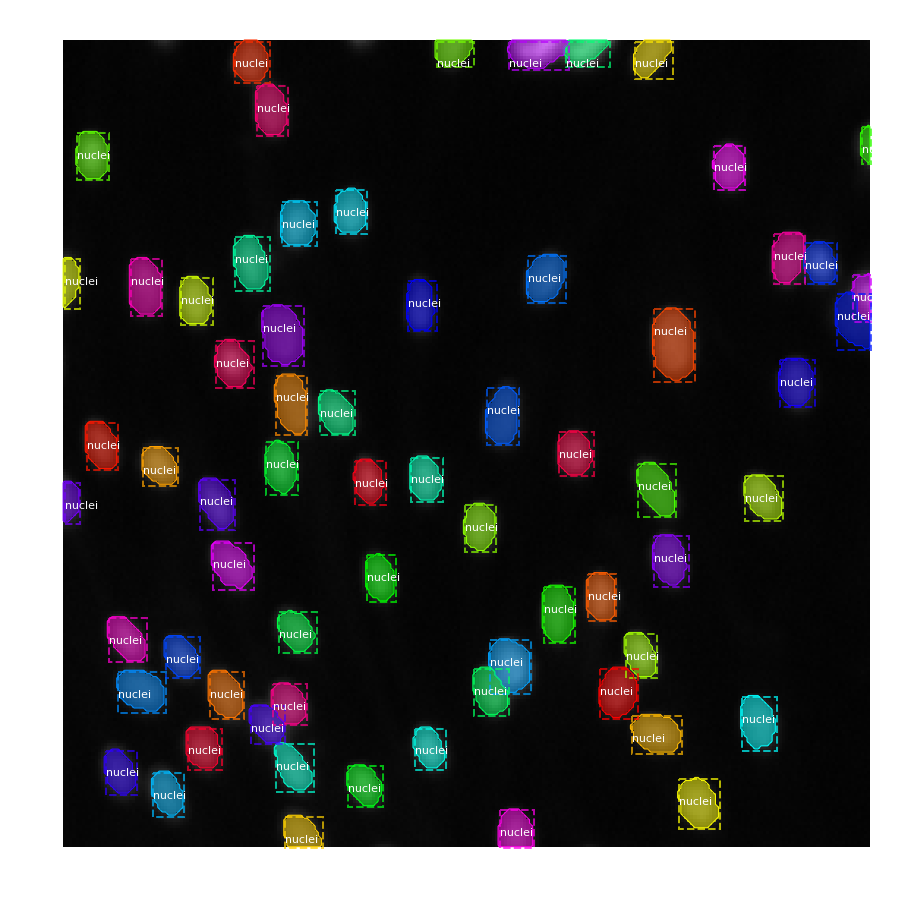

In [11]:
# Load random image and mask.
image_id = random.choice(dataset_train.image_ids)
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_train.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)


image_id:  516 
Original shape:  (256, 256, 3)
image                    shape: (512, 512, 3)         min:   10.00000  max:  164.00000
mask                     shape: (512, 512, 12)        min:    0.00000  max:    1.00000
class_ids                shape: (12,)                 min:    1.00000  max:    1.00000
bbox                     shape: (12, 4)               min:    0.00000  max:  512.00000


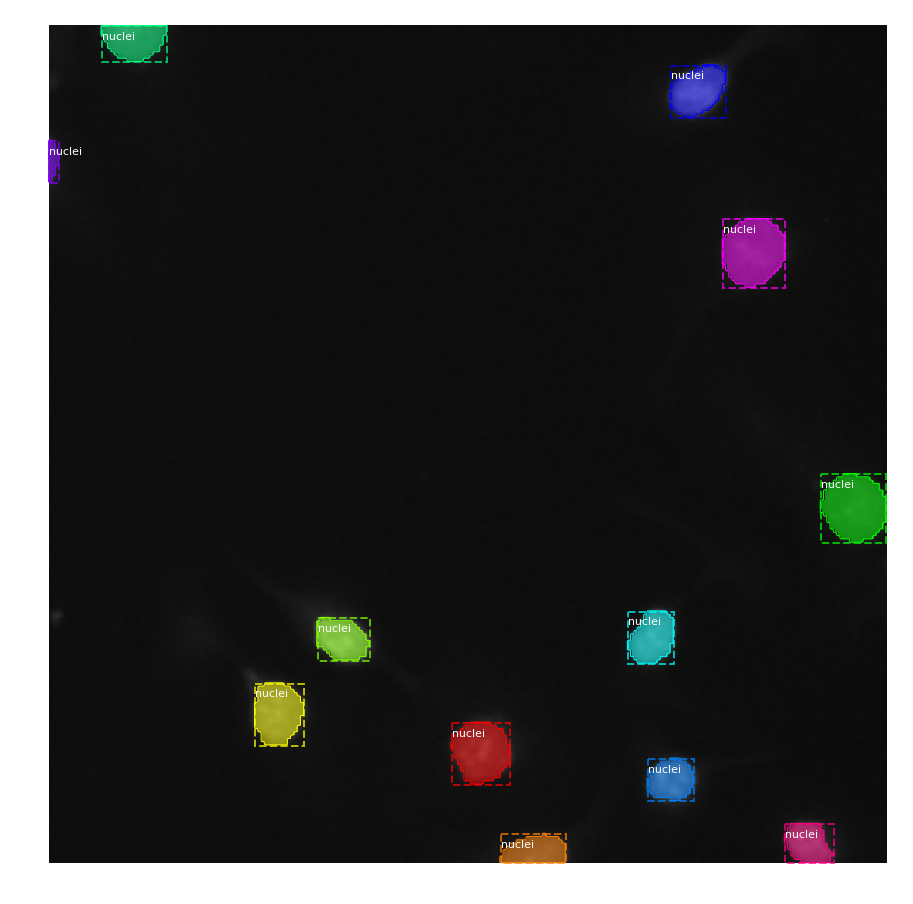

In [12]:
# Load random image and mask.
image_id = np.random.choice(dataset_train.image_ids, 1)[0]
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    padding=config.IMAGE_PADDING)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset_train.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)

image                    shape: (512, 512, 3)         min:    1.00000  max:  133.00000
image_meta               shape: (10,)                 min:    0.00000  max:  512.00000
class_ids                shape: (10,)                 min:    1.00000  max:    1.00000
bbox                     shape: (10, 4)               min:    0.00000  max:  512.00000
mask                     shape: (512, 512, 10)        min:    0.00000  max:    1.00000


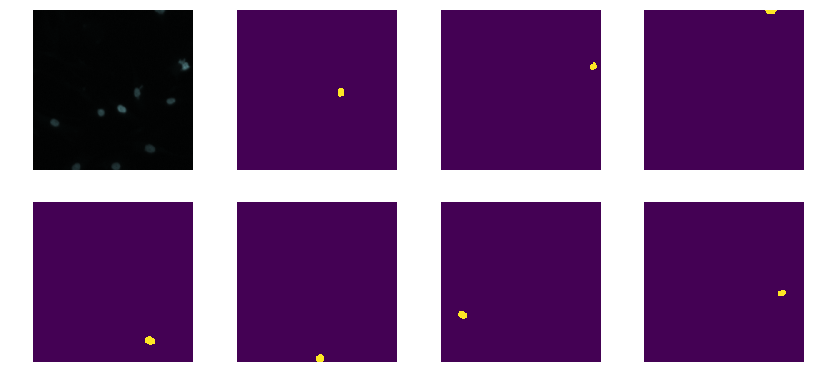

In [13]:
image_id = np.random.choice(dataset_train.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset_train, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

visualize.display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

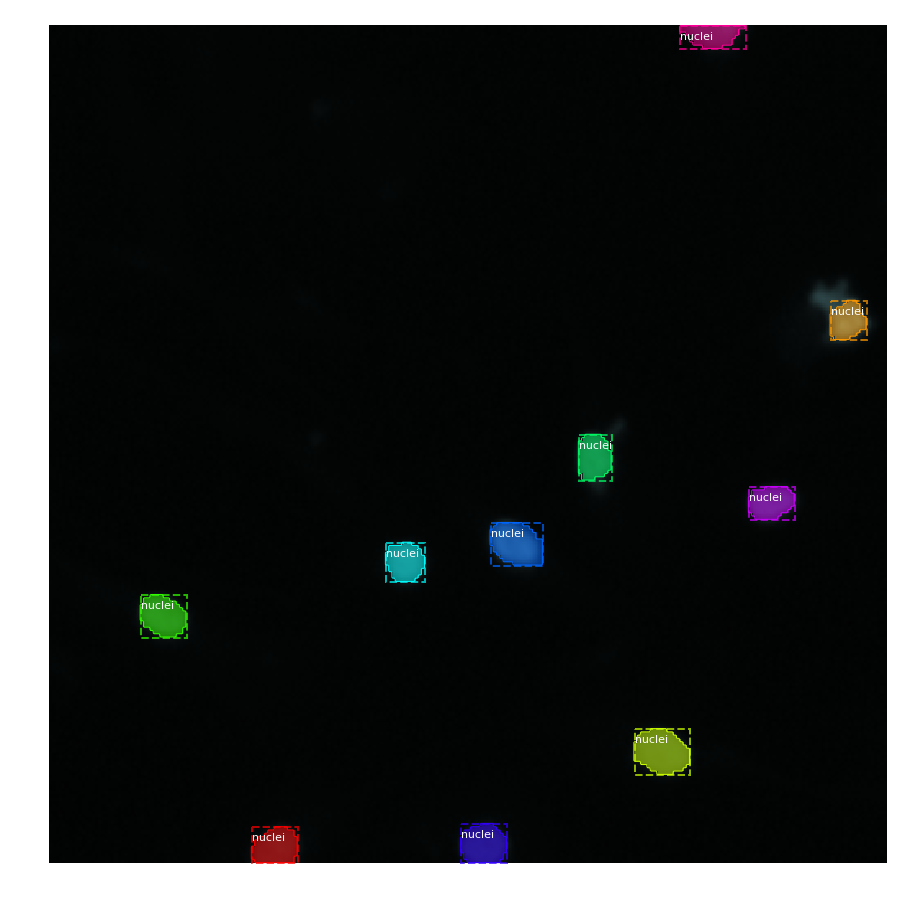

In [14]:
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)

mask                     shape: (56, 56, 10)          min:    0.00000  max:    1.00000


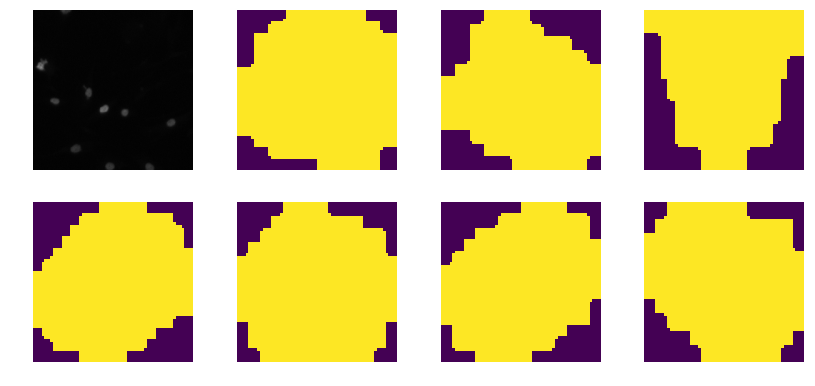

In [15]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset_train, config, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
visualize.display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

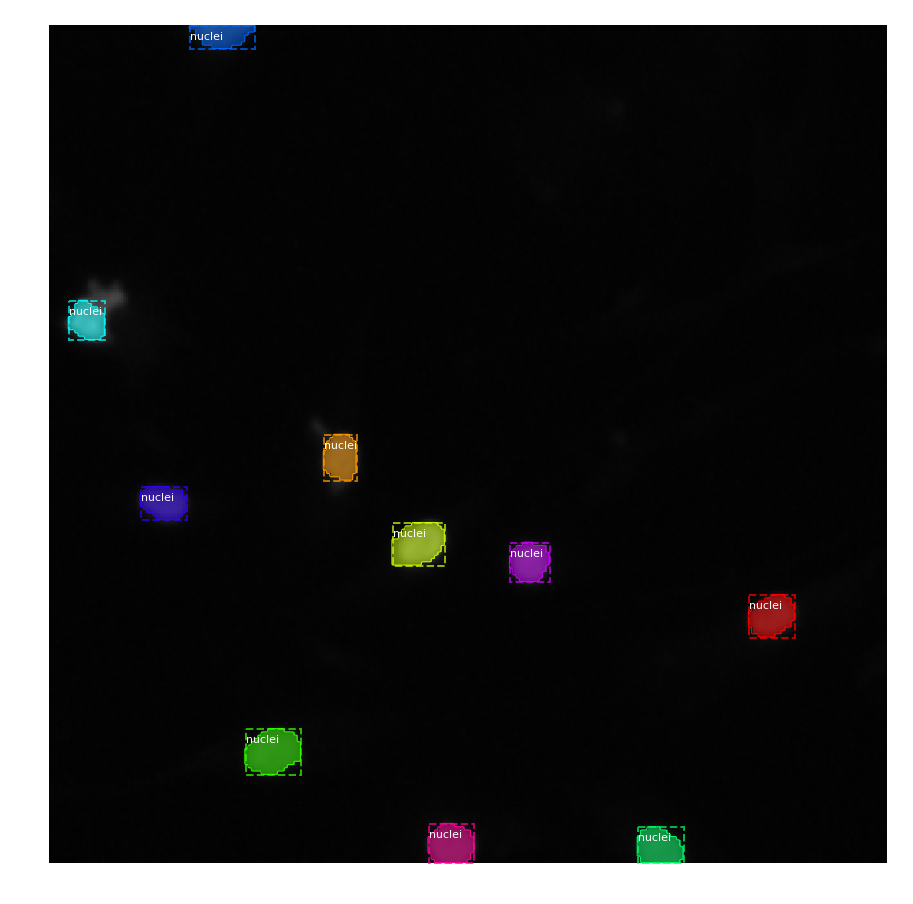

In [16]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)

In [17]:
# Generate Anchors
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          config.BACKBONE_SHAPES,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

# Print summary of anchors
num_levels = len(config.BACKBONE_SHAPES)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = config.BACKBONE_SHAPES[l][0] * config.BACKBONE_SHAPES[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

Count:  65472
Scales:  (4, 8, 16, 32, 64)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  6
Anchors in Level 0: 49152
Anchors in Level 1: 12288
Anchors in Level 2: 3072
Anchors in Level 3: 768
Anchors in Level 4: 192
Anchors in Level 5: 48


/Users/farrar/py3/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Level 0. Anchors:  49152  Feature map Shape: [128 128]
Level 1. Anchors:  12288  Feature map Shape: [64 64]
Level 2. Anchors:   3072  Feature map Shape: [32 32]
Level 3. Anchors:    768  Feature map Shape: [16 16]
Level 4. Anchors:    192  Feature map Shape: [8 8]
Level 5. Anchors:      0  Feature map Shape: [4 4]


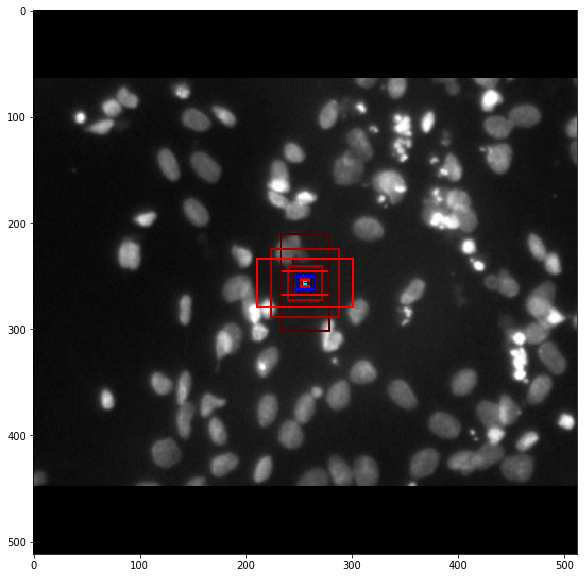

In [18]:
## Visualize anchors of one cell at the center of the feature map of a specific level

# Load and draw random image
image_id = np.random.choice(dataset_train.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset_train, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(config.BACKBONE_SHAPES)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                config.BACKBONE_SHAPES[level]))
    center_cell = config.BACKBONE_SHAPES[level] // 2
    center_cell_index = (center_cell[0] * config.BACKBONE_SHAPES[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * config.BACKBONE_SHAPES[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)

In [19]:
# Create data generator
random_rois = 610
g = modellib.data_generator(
    dataset_train, config, shuffle=True, random_rois=random_rois, 
    batch_size=4,
    detection_targets=True)

In [20]:
# Uncomment to run the generator through a lot of images
# to catch rare errors
#for i in range(610):
#    print(i)
#    _, _ = next(g)

In [21]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = image_meta[0][0]
print("image_id: ", image_id, dataset_train.image_reference(image_id))

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

/Users/farrar/py3/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


rois                     shape: (4, 512, 4)           min:    0.00000  max:  511.00000
mrcnn_class_ids          shape: (4, 512, 1)           min:    0.00000  max:    1.00000
mrcnn_bbox               shape: (4, 512, 2, 4)        min:   -3.42105  max:    2.82265
mrcnn_mask               shape: (4, 512, 28, 28, 2)   min:    0.00000  max:    1.00000
gt_class_ids             shape: (4, 512)              min:    0.00000  max:    1.00000
gt_boxes                 shape: (4, 512, 4)           min:    0.00000  max:  512.00000
gt_masks                 shape: (4, 56, 56, 512)      min:    0.00000  max:    1.00000
rpn_match                shape: (4, 65472, 1)         min:   -1.00000  max:    1.00000
rpn_bbox                 shape: (4, 320, 4)           min:   -6.18718  max:    8.17592
image_id:  6 


anchors                  shape: (65472, 4)            min:  -45.25483  max:  510.82843
refined_anchors          shape: (22, 4)               min:    0.00000  max:  512.00006
Positive anchors: 22
Negative anchors: 298
Neutral anchors: 65152
BG                     : 505
nuclei                 : 7


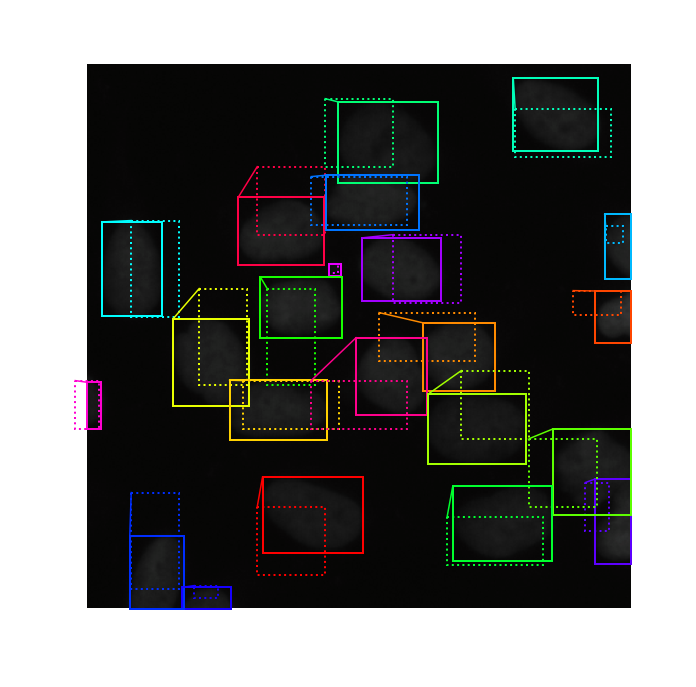

In [22]:
b = 0

# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)

# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)

# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset_train.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors)

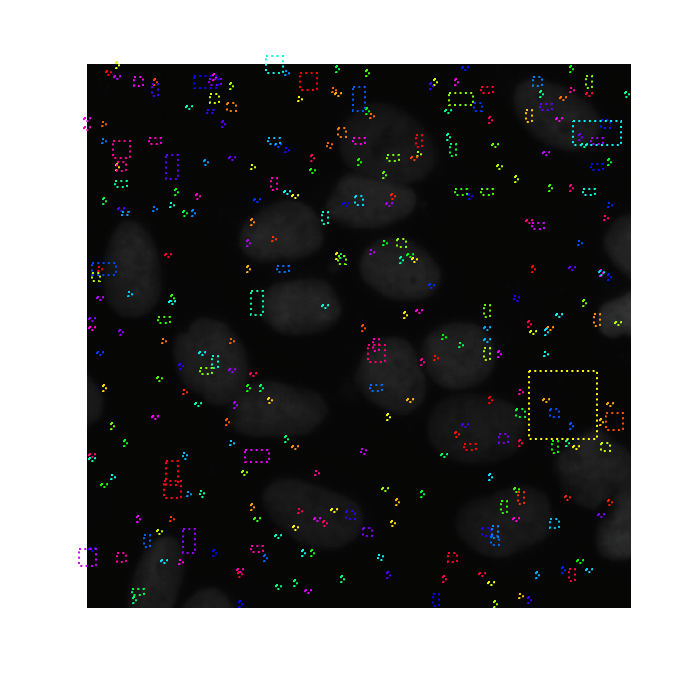

In [23]:
# Show negative anchors
visualize.draw_boxes(sample_image, boxes=anchors[negative_anchor_ids])

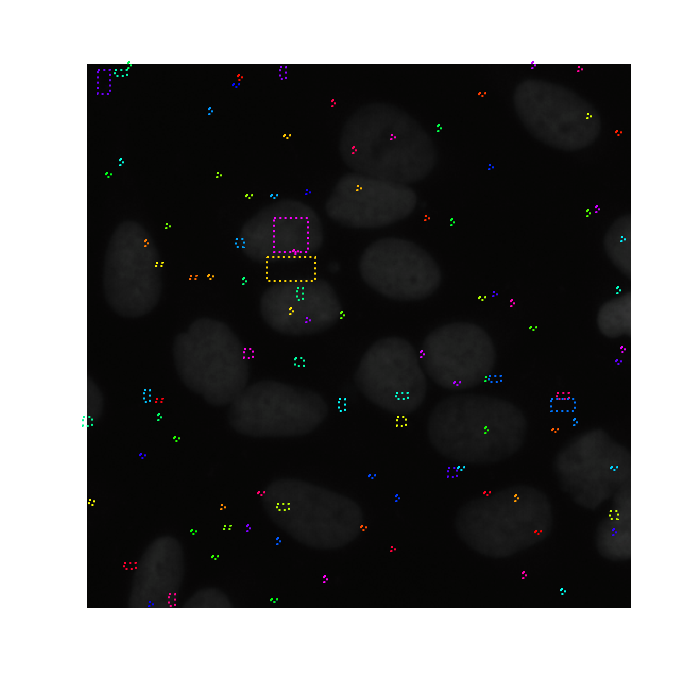

In [24]:
# Show neutral anchors. They don't contribute to training.
visualize.draw_boxes(sample_image, boxes=anchors[np.random.choice(neutral_anchor_ids, 100)])

Positive ROIs:  7
Negative ROIs:  505
Positive Ratio: 0.01
Unique ROIs: 512 out of 512


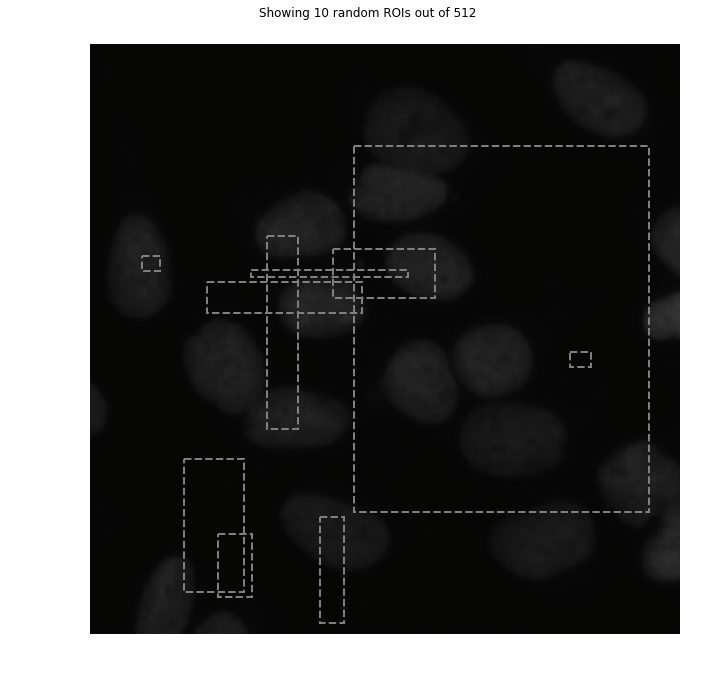

In [25]:
if random_rois:
    # Class aware bboxes
    bbox_specific = mrcnn_bbox[b, np.arange(mrcnn_bbox.shape[1]), mrcnn_class_ids[b], :]

    # Refined ROIs
    refined_rois = utils.apply_box_deltas(rois[b].astype(np.float32), bbox_specific[:,:4] * config.BBOX_STD_DEV)

    # Class aware masks
    mask_specific = mrcnn_mask[b, np.arange(mrcnn_mask.shape[1]), :, :, mrcnn_class_ids[b]]

    visualize.draw_rois(sample_image, rois[b], refined_rois, mask_specific, mrcnn_class_ids[b], dataset_train.class_names)
    
    # Any repeated ROIs?
    rows = np.ascontiguousarray(rois[b]).view(np.dtype((np.void, rois.dtype.itemsize * rois.shape[-1])))
    _, idx = np.unique(rows, return_index=True)
    print("Unique ROIs: {} out of {}".format(len(idx), rois.shape[1]))

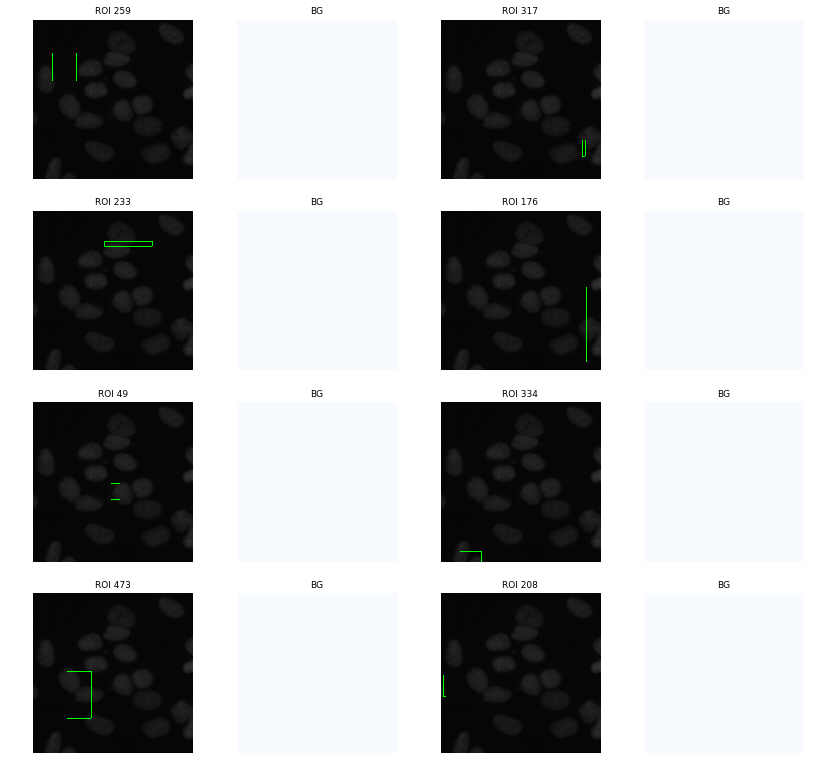

In [26]:
if random_rois:
    # Dispalay ROIs and corresponding masks and bounding boxes
    ids = random.sample(range(rois.shape[1]), 8)

    images = []
    titles = []
    for i in ids:
        image = visualize.draw_box(sample_image.copy(), rois[b,i,:4].astype(np.int32), [255, 0, 0])
        image = visualize.draw_box(image, refined_rois[i].astype(np.int64), [0, 255, 0])
        images.append(image)
        titles.append("ROI {}".format(i))
        images.append(mask_specific[i] * 255)
        titles.append(dataset_train.class_names[mrcnn_class_ids[b,i]][:20])

    visualize.display_images(images, titles, cols=4, cmap="Blues", interpolation="none")

In [27]:
# Check ratio of positive ROIs in a set of images.
if random_rois:
    limit = 10
    temp_g = modellib.data_generator(
        dataset_train, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))


  138  0.27
  168  0.33
  143  0.28
  132  0.26


/Users/farrar/py3/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


  159  0.31
  145  0.28
  142  0.28
  153  0.30
  134  0.26
  101  0.20
Average percent: 0.28
